# understand sampling rate, frequency, amplitude.
* How do we generate, visualize, analyze, and save sound using pure math + code?
- More specifically:
- How a real wave (continuous) becomes digital (samples)
- How to generate a clean tone (sine wave)
- How to store it in a WAV file
- How to confirm the waveform is correct
- How to inspect frequency content (FFT)
- How sampling affects accuracy (Nyquist, aliasing)
- These are core DSP skills (Digital Signal Processing)

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

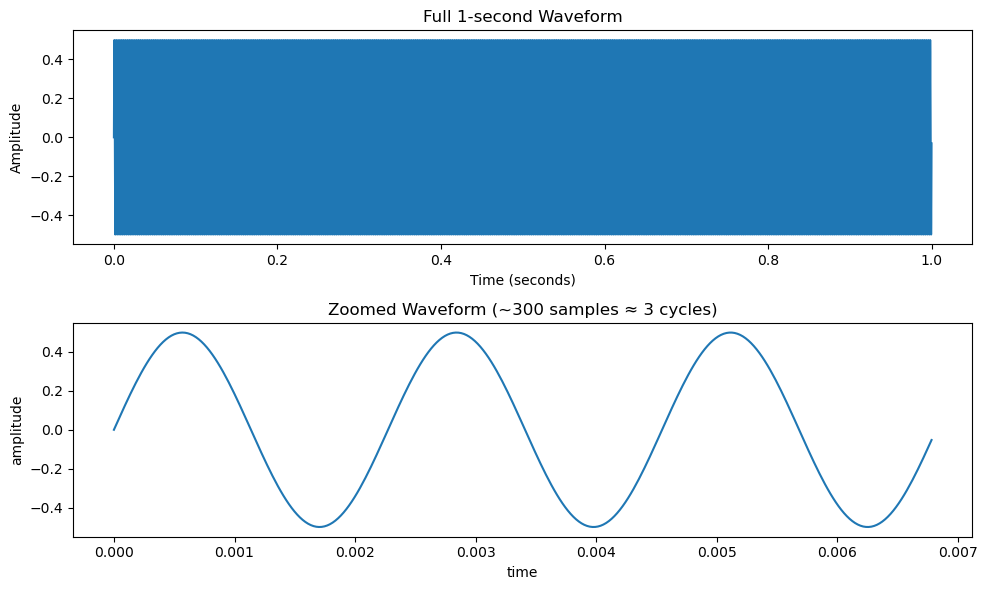

In [ ]:
sample_rate = 44100
duration = 1.0
freq = 440
amplitude = 0.5

time  = np.linspace(0,duration, int(sample_rate*duration), endpoint=False)
wave = amplitude * np.sin(2 * np.pi * freq * time)

time_slice = time[:300]
wave_slice = wave[:300]

fig, axs = plt.subplots(2,1,figsize=(10,6))
axs[0].plot(time, wave)
axs[0].set_title("Full 1-second Waveform")
axs[0].set_xlabel("Time (seconds)")
axs[0].set_ylabel("Amplitude")

axs[1].plot(time_slice,wave_slice)
axs[1].set_title("Zoomed Waveform (~300 samples ≈ 3 cycles)")
axs[1].set_xlabel("Time (seconds)")
axs[1].set_ylabel("Amplitude")

plt.xlabel("time")
plt.ylabel("amplitude")
plt.tight_layout()
plt.show()

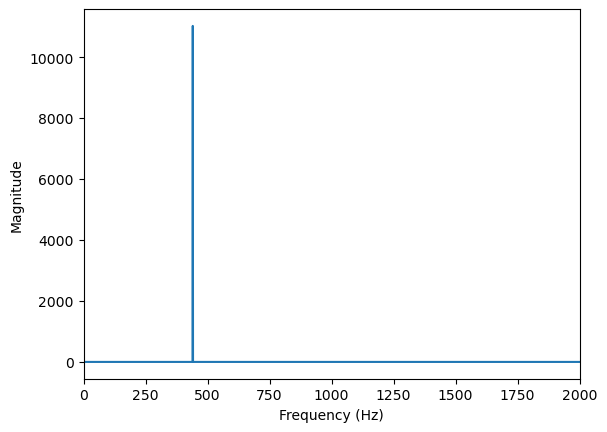

In [18]:
N = len(wave)
fft_vals = np.fft.fft(wave)
fft_fraq = np.fft.fftfreq(N, 1/sample_rate)
positive_vals = abs(fft_vals[:N //2])
positive_freq = fft_fraq[:N//2]
plt.plot(positive_freq,positive_vals)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 2000)
plt.show()

In [20]:
scale_wave = wave * 32767
int_wave = scale_wave.astype(np.int16)
from scipy.io.wavfile import write
write("filename.wav", sample_rate, int_wave)